In [1]:
# veri setinin hazırlanması ve preprocessing
from keras.datasets import mnist # load mnist
from keras.utils import to_categorical #kategorik verilere çevirme
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential #sıralı model
from keras.layers import Dense #bağlı katmanlar

from keras.models import load_model #modelin geri yüklenmesi 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

2025-07-15 00:31:15.456356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#mnist veri setini eğitim ve test veri seti olarak ayrı ayrı yükle
(x_train, y_train), (x_test, y_test) = mnist.load_data()

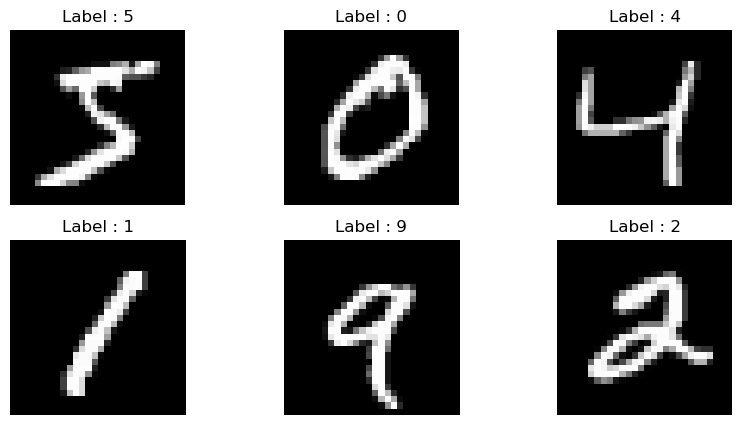

In [3]:
#birkaç örneği görselleştirme
plt.figure(figsize=(10,5))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label : {y_train[i]}")
    plt.axis("off")
plt.show()

In [4]:
#veri setini normalize edelim, 0-255 aralığındaki pixel değerlerini 0-1 arasına ölçeklendiriyoruz
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2])).astype("float32")/255
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2])).astype("float32")/255

In [5]:
#etiketleri kategorik hale getir (0-9 arasındaki rakamları one-hot encodingyapıyoruz)
y_train = to_categorical(y_train, 10) # 10 sınıf sayısını temsil eder
y_test = to_categorical(y_test, 10)

In [6]:
##ANN modelinin oluşturulması ve derlenmesi
model = Sequential()

#ilk katman : 512 cell, Relu activation function, input size 28*28
model.add(Dense(512, activation="relu", input_shape = (28*28,)))

#ikinci katman :  256 cell, activation: tanh
model.add(Dense(256, activation="tanh"))

#output layer: 10 tane olmak zorunda, activation softmax olmak zorunda - ikiden fazla sınıf varsa softmax 
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


2025-07-15 00:31:34.544891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
#model derlemesi: optimizer (adam: büyük veri ve kompleks ağlar için idealdir)
#model derlemesi: loss (categorical_crossentropy) sınıflandırma için kullanılır genellikle 
#model derlemesi: metrik (accuracy)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
#Callbacklerin tanımlanmsı ve ANN eğitilmesi
#Erken durdurma: eğer var_loss iyileşmiyorsa eğitimi durduralım
#monitor: doğrulama setindeki (val) kaybi (loss) izler
#patience: 3 epoch boyunca val loss değişmiyorsa erken durduma yapalım
#restore_best_weights: en iyi modelin ağırlıklarını geri yükler 
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

#model checkpoint: en iyi modelin ağırlıklarını kaydeder
#save_best_only: sadece en iyi performans gösteren modeli kaydeder
checkpoint = ModelCheckpoint("ann_best_model.h5", monitor="val_loss", save_best_only=True)

In [9]:
#model training: 10 epochs, batch size = 60, doğrulama seti oranı = %20
history = model.fit(x_train, y_train, #train veri seti
          epochs=10, #model toplamda 10 kere veri setini görecek yani veri seti 10 kere eğitilecek
          batch_size=60, #veri seti 60'erli parçalar ile eğitim yapacak
          validation_split=0.2, #eğitim verisinin %20 si doğrulama verisi olarak kullanılacak
          callbacks=[early_stopping, checkpoint])

Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 0.2087 - accuracy: 0.9365 - val_loss: 0.1588 - val_accuracy: 0.9539
Epoch 2/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0841 - accuracy: 0.9736 - val_loss: 0.0958 - val_accuracy: 0.9729
Epoch 3/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0826 - val_accuracy: 0.9761
Epoch 4/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.0898 - val_accuracy: 0.9747
Epoch 5/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.1129 - val_accuracy: 0.9714
Epoch 6/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0261 - accuracy: 0.9908 - val_loss: 0.0953 - val_accuracy: 0.9733


In [10]:
#model evaluation, görselleştirme, model save and load 
#test verisi ile model performansı değerlendirme 
#evaluate: modelin test verisi üzerindeki loss (test_loss) ve accuracy (test_acc) hesaplar
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test acc: {test_acc}, test loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9766
Test acc: 0.9765999913215637, test loss: 0.07403930276632309


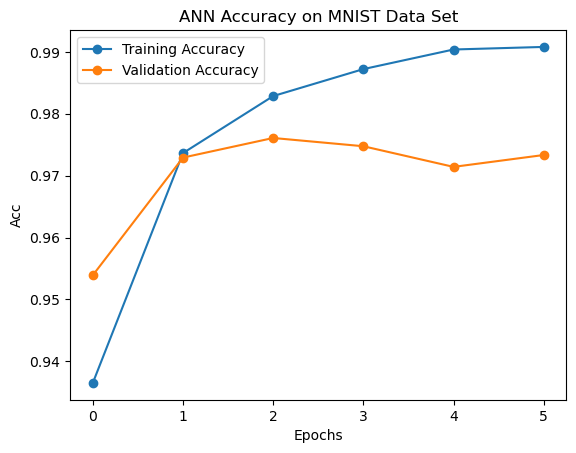

In [11]:
#training and validation accuracy görselleştirme
plt.figure()
plt.plot(history.history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.title("ANN Accuracy on MNIST Data Set")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.legend()
plt.show()

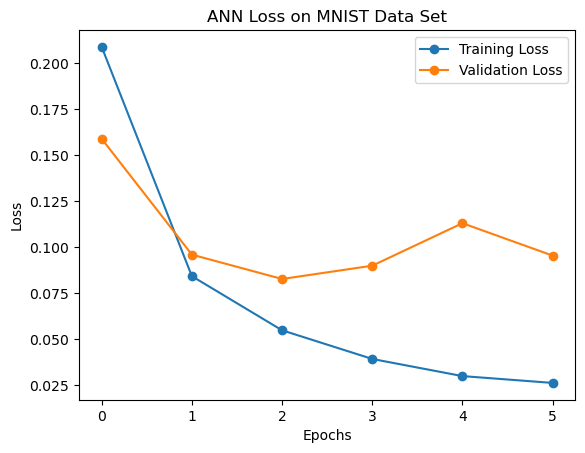

In [12]:
#train and validation loss görselleştirme
plt.figure()
plt.plot(history.history["loss"], marker = "o", label = "Training Loss")
plt.plot(history.history["val_loss"], marker = "o", label = "Validation Loss")
plt.title("ANN Loss on MNIST Data Set")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
#modeli kaydetme
model.save("final_mnist_ann_model.h5")

#kaydedilen modeli yükleme 
loaded_model = load_model("final_mnist_ann_model.h5")

#kaydedilmiş model sonuçlarını gösterme
test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f"Loaded Model Result -> Test Acc: {test_acc}, Test Loss : {test_loss}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0740 - accuracy: 0.9766
Loaded Model Result -> Test Acc: 0.9765999913215637, Test Loss : 0.07403930276632309
